<b/>PHYS40591/64591 RADIO ASTRONOMY 2015

Examples covering material in lectures 7&8</b>




----------------------------------------------------------------------------

<b/>Question 1.</b>

<i/>The Lovell telescope has a diameter of 76 m. Make an estimate of its maximum gain $G_{\rm max}$ at 21 cm wavelength expressing your answer in dB. </i>

The gain of our antenna is approximately equivalent to its directivity:

$$G_{\rm max} = \frac{4\pi}{\Omega_{\rm A}}.$$

To complete this calculation we need to know $\Omega_{\rm A}$. From the <b/>antenna theorem</b>,

$$\Omega_{\rm A} = \frac{\lambda^2}{A_{\rm e}}.$$

We know that the wavelength is 21cm:


In [1]:
lam = 0.21   # metres

So we just need to calculate the effective area of the antenna,

$$A_{\rm e} = \frac{\pi d^2}{4}\times \eta$$.

We don't know what the efficiency, $\eta$, is - but we can make an educated guess:

In [2]:
eta = 0.6   # assume 60% efficiency

We can now calculate out effective area andhence the gain:

In [3]:
import numpy as np

d = 76.0   # metres

Ae = eta*np.pi*d**2/4.
print "Effective area: ",Ae," m"

omega_a = lam**2/Ae
print "Beam solid angle: ",omega_a," sterad"

G = 4.*np.pi/omega_a
print "Forward gain: ",10.*np.log10(G)," dB"

Effective area:  2721.87587507  m
Beam solid angle:  1.62020613812e-05  sterad
Forward gain:  58.8963959087  dB






----------------------------------------------------------------------------

<b/>Question 2.</b>

<i/>The ratio $A_{\rm e}/2 k_{\rm B}$ is a convenient parameter for specifying the sensitivity of a radio telescope using units of K/Jy i.e. the antenna temperature $T_{\rm A}$ K produced by an unpolarized point source of flux density 1 Jy (1 Jy = $10^{-26}$ W m$^{-2}$ Hz$^{-1}$). 

(a) What is the effective collecting area $A_{\rm e}$ of a radio telescope whose sensitivity is 1 K/Jy? 


(b) The 2.3 GHz “feed” at the Arecibo radio telescope illuminates an elliptical aperture 225 m by 200 m in size, and the aperture efficiency over this ellipse is 0.70. What is the sensitivity of this system in K/Jy? 

(c) The same feed is used with a transmitter at 2.3 GHz for planetary radar. What is the on-axis power gain $G_{\rm max}$ of this radar system? 
</i>


(a) From the relationship between flux density and antenna temperature,

$$T_{\rm A} = \frac{S A_{\rm e}}{2 k_{\rm B}},$$

we can rearrange to find an expression for $A_{\rm e}$:

$$A_{\rm e} = 2 k_{\rm B} \frac{T_{\rm A}}{S}.$$

We are looking for a sensitivity of 1 K/Jy, so we can replace that ratio of $T_{\rm A}/S$ with $1/10^{-26}$:

In [4]:
k_b = 1.38e-23   # Boltzmann's constant
rat = 1e26       # ratio of 1 K/Jy

Ae = 2*k_b*rat
print "Effective area: ",Ae," m^2"

Effective area:  2760.0  m^2




(b) The Arecibo dish is elliptical, so it has a physical area of:

In [5]:
bmaj = 225.   # major axis
bmin = 220.   # minor axis

Ag = np.pi*bmaj*bmin/4.
print "Physical area: ",Ag," m^2"

eta = 0.7

Ae = eta*Ag
print "Effective area: ",Ae," m^2"

Physical area:  38877.2090882  m^2
Effective area:  27214.0463617  m^2


We can then calculate the sensitivity:

$${\rm Sens.} = \frac{A_{\rm e}}{2k_{\rm B}}.$$

In [6]:
sens = 1e-26*Ae/(2.*k_b)
print "Sensitivity: ",sens,"K/Jy"

Sensitivity:  9.86016172526 K/Jy


<b/>Note:</b> the factor of $10^{-26}$ to get the Jy units.



(c) We use the same equation for gain as we did previously, but use the <b/> antenna theorem </b> to change the variables:

$$G = \frac{4\pi}{\Omega_{\rm A}} = \frac{4\pi A_{\rm e}}{\lambda^2}.$$

In [7]:
nu = 2.3e9     # Hz
lam = 3e8/nu   # metres

G = 4*np.pi*Ae/lam**2
print "Gain: ",10.*np.log10(G)," dB"

Gain:  73.0321614693  dB






----------------------------------------------------------------------------

<b/>Question 3.</b>

<i/>The planet Uranus is observed with a 30-m diameter radio telescope operating at $\lambda$ = 3 mm. At a certain epoch the planet has an angular diameter of 3.5 arcsec and a brightness temperature of 100K. Estimate the antenna temperature, $T_{\rm A}$, that would be measured if the telescope has an aperture efficiency of 50\% 
	
a) Using the direct beam dilution approach; 
	
b) Starting by calculating the flux density.
</i>


(a) Again, let's start from the <b/>antenna theorem</b>:

$$A_{\rm e}\Omega_{\rm A} = \lambda^2.$$

From this we can calculate that,

$$\Omega_{\rm A} = \frac{\lambda^2}{A_{\rm e}}.$$

In [8]:
lam = 0.003   # metres
d = 30        # metres
eta = 0.5     # 50% efficiency

Ae = eta*np.pi*(d/2.)**2
print "Effective area: ",Ae," m^2"

omega_a = lam**2/Ae
print "Beam solid angle: ",omega_a," sterad"

Effective area:  353.429173529  m^2
Beam solid angle:  2.54647908947e-08  sterad


We can also calculate the solid angle subtended by Uranus:

In [9]:
omega_u_asec = 3.5   # arcsec
omega_u_rad = omega_u_asec*(1./60.)**2*(np.pi/180.)

Au = np.pi*omega_u_rad**2/4.
print "Uranus solid angle: ", Au," rads"

Uranus solid angle:  2.2613912307e-10  rads


The beam dilution approach uses the solid angle ratio,

$$T_{\rm ant} = \left( \frac{\Omega_{\rm Uranus}}{\Omega_{\rm A}} \right) T_{\rm Uranus}.$$

In [10]:
t_u = 100.   # 100K

t_a = (Au/omega_a)*t_u
print "Antenna temperature: ",t_a," K"

Antenna temperature:  0.888046259656  K




(b) Start by calculating the flux density from Uranus:

$$S = \frac{2k_{\rm B}T_{\rm Uranus}}{\lambda^2}\cdot \Omega_{\rm Uranus}.$$

In [11]:
s_uranus = (2*k_b*t_u/lam**2)*Au
print "Flux density: ",s_uranus*1e26," Jy"

Flux density:  6.93493310747  Jy


We can then use the linear relationship between flux density and antenna temperature:

$$T_{\rm A} = \frac{SA_{\rm e}}{2k_{\rm B}},$$

to calculate:

In [12]:
eta = 0.5 # 50% efficiency
d = 30.   # metres

Ae = eta*np.pi*(d/2.)**2
print "Effective area: ",Ae," m^2"

t_ant = s_uranus*Ae/(2.*k_b)
print "Antenna temperature: ",t_ant," K"

Effective area:  353.429173529  m^2
Antenna temperature:  0.888046259656  K




print "(<b/> Note: </b> factor of $10^{26}$... where is this applied?)"





----------------------------------------------------------------------------

<b/>Question 4.</b>

<i/>Graphically apply the convolution theorem to the pair of functions $f(t)$ and $g(t)$ illustrated below i.e. to produce a rough estimate of the shape of $Y(t) = f(t)\ast g(t)$. Show at least four specific steps in the relative offset t and shade the common areas and hence explore the shape of the function $Y$ . If you have time confirm that you get the same answer by exchanging $f(t)$ for $g(t)$ —> convolution is commutative.
</i>

Here I'm just going to use the python library routines to show the result of this convolution. If you want to make a convolution animation like the ones in Lecture 7 try the <b/>ConvolutionAnimation.ipynb</b> script...

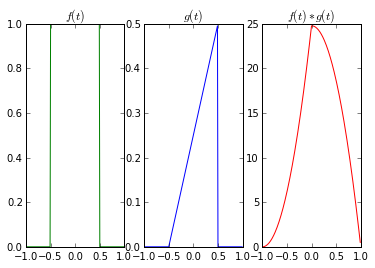

In [13]:
%matplotlib inline

import numpy as np
import pylab as pl

t = np.arange(-1,1,0.01)

l = len(t)
s = l/4

# make a tophat function:
f = np.zeros(l)
f[s:-s] = 1.

# make a triangle function:
g = np.zeros(l)
g[s:-s] = 0.5*(t[s:-s] - t[s])

# convolve the functions:
c = np.convolve(f,g,mode='same')

pl.subplot(131)
pl.plot(t,f,c='g')
pl.title(r"$f(t)$")
pl.subplot(132)
pl.plot(t,g,c='b')
pl.title(r"$g(t)$")
pl.subplot(133)
pl.plot(t,c,c='r')
pl.title(r"$f(t)\ast g(t)$")
pl.show()





----------------------------------------------------------------------------

<b/>Question 5.</b>

<i/>A radio telescope of 500 m$^2$ effective aperture is operating at a frequency of 1.5 GHz and is pointed at the zenith. Calculate the measured antenna temperature $T_{\rm A}$ assuming that:

• the sky brightness temperature is everywhere uniform and equal to 10K;

• the effective ground brightness temperature is 300K

• half the beam area associated with sidelobes (i.e. the reception pattern outside the main beam solid angle $\Omega_{\rm m}$) is in the opposite direction to the main beam whose efficiency is 0.7.</i>

The solid angle subtended by the antenna, $\Omega_{\rm A}$, as given by our antenna theorem equation, $A_{\rm e}\Omega_{\rm A} = \lambda^2$, is the sum over the main lobe and the sidelobes:

$$\Omega_{\rm A} = \Omega_{\rm main} + \Omega_{\rm side}.$$

We have been told that the main beam efficiency is 70%, so we know that the sidelobes make up 30% of $\Omega_{\rm A}$. Half of these sidelobes are pointing backwards, so 15% of the full beam is measuring the temperature of the Earth (300 K) and 85% is looking at the sky (10 K).

So we can work out the antenna temperature as:

In [14]:
t_sky = 10.      # kelvin
t_earth = 300.   # kelvin

t_ant = 0.85*t_sky + 0.15*t_earth
print "Antenna temperature: ",t_ant," K"

Antenna temperature:  53.5  K






----------------------------------------------------------------------------

<b/>Question 6.</b>

<i/>A radio telescope of diameter 100-m is operated at a frequency of 5 GHz to map a region of Galactic synchrotron emission of area 1000 deg$^2$. If the “feed” produces a taper at the edge of the aperture of 15 dB - estimate:

(a) the beam width and hence highest angular frequency that the telescope passes;

(b) the number of independent data points in the survey and the number of independent pixels in the final map. </i>

If the aperture is fully illuminated then it spans:

In [15]:
const_c = 3e8      # m/s
nu = 5e9           # Hz
lam = const_c/nu   # metres
print "Wavelength is ",lam," m"

d = 100.           # metres

n_wave = d/lam
print "Number of wavelengths across dish: ",n_wave

Wavelength is  0.06  m
Number of wavelengths across dish:  1666.66666667


But the illumination tapered, so let's round this down a bit:

In [16]:
n_wave_tap = 1400.

So the beam width is:

In [17]:
bm = (n_wave/n_wave_tap)*lam/d
print "Beam size: ",bm," rad"
print "           ",bm*180./np.pi," deg"
print "           ",bm*(180./np.pi)*60," arcmin"

Beam size:  0.000714285714286  rad
            0.0409255567951  deg
            2.4555334077  arcmin


(Note that our beam should be slightly <b/>larger</b> with a taper.)

The Nyquist sampling criterion says that we need to take at least two samples across the beam, but to be safe we'll take three. In this case our step size is:

In [18]:
step = bm*(180./np.pi)/3.   # degrees
print "Step size: ",step," deg"

Step size:  0.013641852265  deg


Consequently, in one degree squared we have:

In [19]:
n_samp = (1./step)**2
print "Samples in 1 degree: ",n_samp

Samples in 1 degree:  5373.45128504


and in 1000 sq. degrees:

In [20]:
n_samp_1000 = 1000.*n_samp
print "Samples in 1000 sq. degrees: ",n_samp_1000

Samples in 1000 sq. degrees:  5373451.28504






----------------------------------------------------------------------------

<b/>Question 7.</b>

<i/>A small parabolic antenna of diameter 3 m has an aperture efficiency of 60% and is operated at a frequency of 12 GHz (i.e. satellite TV channels). Calculate the antenna beam solid angle and make a rough estimate of the likely main beam solid angle and main beam efficiency.</i>

Let's start by listing what we know:

In [21]:
d = 3.     # metres
eta = 0.6
nu = 12e9  # Hz

lam = const_c/nu  # metres
print "Wavelength: ",lam," m"

Ae = eta*np.pi*d**2/4.
print "Effective area: ",Ae," m^2"

Wavelength:  0.025  m
Effective area:  4.24115008235  m^2


We can use these quantities and the <b/> antenna theorem </b> to calculate the antenna beam solid angle,

$$\Omega_{\rm A} = \frac{\lambda^2}{A_{\rm e}}.$$

In [22]:
omega_a = lam**2/Ae
print "Beam solid angle: ",omega_a," sterad"

Beam solid angle:  0.000147365688048  sterad


The typical angular size of the main lobe can be calculated (roughly) using

$$\theta_{1/2} = 1.15\frac{\lambda}{D}.$$

In [23]:
omega_m = (1.15*lam/d)**2
print "Main lobe beam size: ",omega_m," sterad"

Main lobe beam size:  9.18402777778e-05  sterad


The main lobe efficiency is given by the ratio $\Omega_{\rm m}/\Omega_{\rm A}$:

In [24]:
eff_ml = omega_m/omega_a
print "Main lobe efficiency: ",eff_ml*100.,"%"

Main lobe efficiency:  62.3213442656 %





----------------------------------------------------------------------------

<b/> Done! </b>